<a href="https://colab.research.google.com/github/yuji-matsunami/kaggle_cifar-10/blob/main/kaggle_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像の読み込みの確認

- datasetまとめ
    - 写真はtrainディレクトリにある
    - カテゴリごとにばらばらなのでcsvファイルを読み込んでdataframeをつくる必要がある

    

In [ ]:
# ドライブから圧縮ファイルをコピーしてカレントディレクトリに展開する

!cp /content/drive/MyDrive/データサイエンス/cifar-10.zip .
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [ ]:
# 試しにトレインデータを展開
!7z x /content/train.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 109723070 bytes (105 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2%      2% - train/1.png                    2% 1079 - train/1097.png                            2% 1561 - train/11402.png                             4% 1868 - train/1168.png                            6% 1890 - train/117.png                         

In [ ]:
# 画像が多すぎて時間めっちゃかかる
!7z x /content/test.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 639374249 bytes (610 MiB)

Extracting archive: /content/test.7z
--
Path = /content/test.7z
Type = 7z
Physical Size = 639374249
Headers Size = 1721070
Method = LZMA:26
Solid = +
Blocks = 1

  0%      0% - test/1.png                   0% 934 - test/100838.png                            0% 1352 - test/101213.png                             0% 1709 - test/101535.png                             0% 1841 - test/101654.png                           

In [ ]:
# opencvをインストール(多分いらない)
!pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

TRAIN_BASE_DIR = "/content/train"
CATEGORYS = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(len(CATEGORYS))

10


## 画像の配列について

- 32×32×RGB(3)

28377.png
(32, 32, 3)


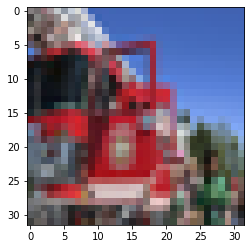

In [ ]:
# 画像の読み込みと表示
from glob import glob

for image_name in os.listdir(TRAIN_BASE_DIR):
    print(image_name)
    img_array = cv2.imread(os.path.join(TRAIN_BASE_DIR,image_name),)
    # BGR→RGBにする
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    print(img_array.shape)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break


# データフレームの作成

In [ ]:
import csv
import pandas as pd
# 画像とラベルを格納するリスト
x_train = []
y_train = []

train_data = []
train_label_csv = '/content/trainLabels.csv'
df = pd.read_csv(train_label_csv)
print(df)


          id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]


# 画像をリストに格納する

In [ ]:
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import torch
import torch.nn.functional as F

class CreateDataset(Dataset):
    def __init__(self, dir_name, csv_file, data_transform):
        self.dir_name = dir_name
        self.df = pd.read_csv(self.dir_name + csv_file)
        self.data_transform = data_transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,i):
        file_id = df['id'][i]
        label = np.array(df['label'][i])
        image = Image.open(self.dir_name+ '/train/' + str(file_id) +'.png')
        image = self.data_transform(image)
        # label = self.data_transform(label)
        # label = CATEGORYS.index(label)
        label = torch.tensor(CATEGORYS.index(label))
        label_onehot = F.one_hot(label, num_classes=10)

        return image, label

##### 精度向上には前処理が必要だと思う

In [ ]:
data_transform = transforms.Compose([transforms.ToTensor()]) # とりあえずテンソルに変換だけしてみた

dataset = CreateDataset(dir_name='/content', csv_file='/trainLabels.csv',data_transform=data_transform)

print(dataset[0][0])


tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

# テストデータの作成

- ラベルがなさそうだからtorchvisionからダウンロードする

In [ ]:
import torchvision

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=data_transform)
testloader = DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)


Extracting ./data/cifar-10-python.tar.gz to ./data


# 画像を全部表示させる(確認用)

- 試しに20個だけ表示
- if文を変更すると表示枚数を変えることができる

<class 'torch.Tensor'>


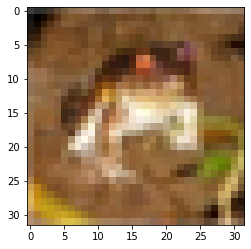

labels:  tensor(6)
<class 'torch.Tensor'>


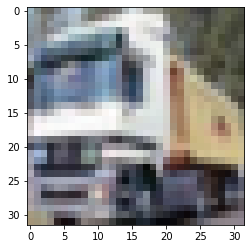

labels:  tensor(9)
<class 'torch.Tensor'>


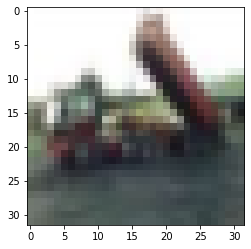

labels:  tensor(9)
<class 'torch.Tensor'>


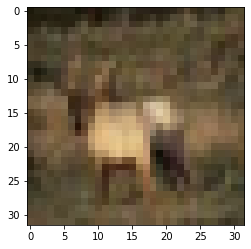

labels:  tensor(4)
<class 'torch.Tensor'>


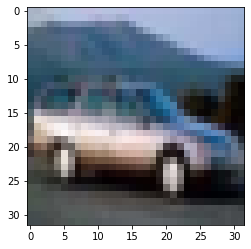

labels:  tensor(1)
<class 'torch.Tensor'>


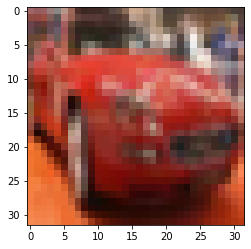

labels:  tensor(1)
<class 'torch.Tensor'>


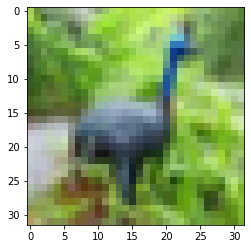

labels:  tensor(2)
<class 'torch.Tensor'>


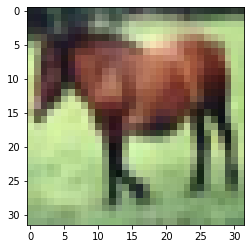

labels:  tensor(7)
<class 'torch.Tensor'>


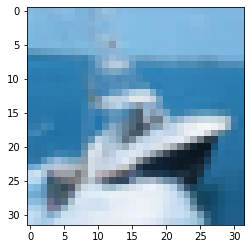

labels:  tensor(8)
<class 'torch.Tensor'>


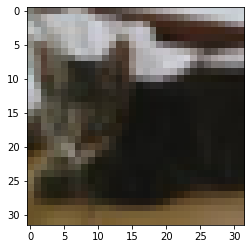

labels:  tensor(3)
<class 'torch.Tensor'>


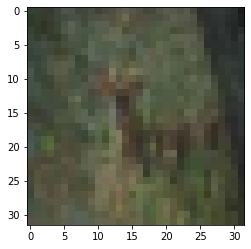

labels:  tensor(4)
<class 'torch.Tensor'>


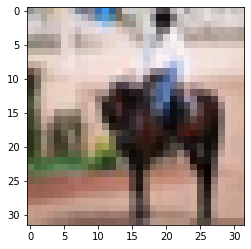

labels:  tensor(7)
<class 'torch.Tensor'>


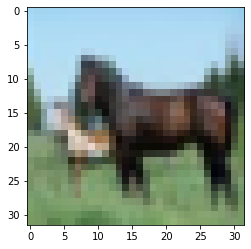

labels:  tensor(7)
<class 'torch.Tensor'>


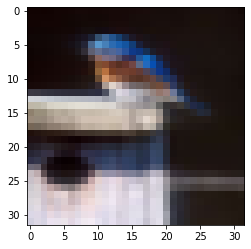

labels:  tensor(2)
<class 'torch.Tensor'>


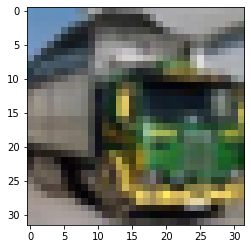

labels:  tensor(9)
<class 'torch.Tensor'>


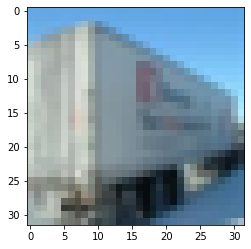

labels:  tensor(9)
<class 'torch.Tensor'>


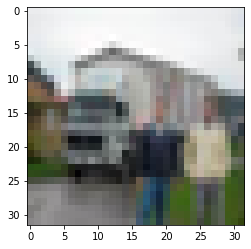

labels:  tensor(9)
<class 'torch.Tensor'>


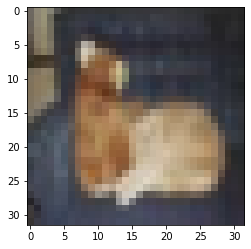

labels:  tensor(3)
<class 'torch.Tensor'>


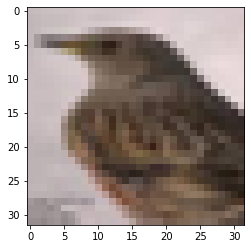

labels:  tensor(2)
<class 'torch.Tensor'>


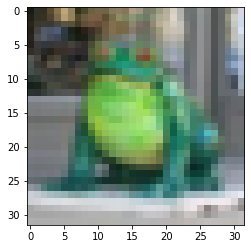

labels:  tensor(6)
<class 'torch.Tensor'>


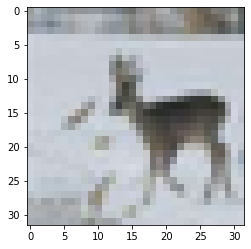

labels:  tensor(4)


In [ ]:
from torchvision.utils import make_grid
# 画像表示用関数

def imshow(img):
    print(type(img))
    # Tensor to numpy
    np_img = img.numpy()
    np_img = np.transpose(np_img,(1,2,0))
    plt.imshow(np_img)
    plt.show()

# 画像を順番に表示させるようにする
data_iter = iter(dataset)
for i in range(len(dataset)):
    images, labels = next(data_iter)

    imshow(make_grid(images))
    print('labels: ', labels)
    if i >= 20:
        break




# ネットワーク構築

- 説明
    - とりあえずcnnを構築
    - cnnについて詳しい解説は[こちらから](https://ai-antena.net/ai-cnn)
    

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.line1 = nn.Linear(16*5*5,120)
        self.line2 = nn.Linear(120, 84)
        self.line3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.line1(x))
        x = F.relu(self.line2(x))
        x = self.line3(x)
        
        return x

        


cuda


In [ ]:
import torch.optim as optim
train_datas = DataLoader(dataset=dataset, batch_size=16, shuffle=True)
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 学習loop

train_losses_hist = []
train_acc_hist = []
val_losses_hist = []
val_acc_hist = []


print(len(dataset))
# print(dataset[49999])
for epoch in range(150):

    all_loss = 0
    acc = 0
    for i,data in enumerate(train_datas):
        inputs, labels = data
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        # print(labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        all_loss += loss.item()
        if i % 2000 == 1999:

            print("epoch: ", epoch+1,"step: ", i+1,"loss: ", all_loss / 2000)
            # train_losses_hist.append(all_loss / 2000)
            tmp_loss = all_loss / 2000
            all_loss = 0
        
        #精度計算
        _, pre = torch.max(outputs, 1)
        acc += torch.sum(pre == labels)
    print("acc: ", acc.item()/len(dataset))
    train_acc_hist.append(acc.item() / len(dataset))
    train_losses_hist.append(tmp_loss)
    
    # ここから検証
    all_loss = 0
    acc = 0
    with torch.no_grad():
        for i,data in enumerate(testloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            all_loss += loss.item()
            if i % 2000 == 1999:
                print("epoch: ", epoch+1, "step: ", i+1, "loss: ", all_loss / 2000)
                val_losses_hist.append(all_loss / 2000)
                all_loss = 0

            _,pre = torch.max(outputs, 1)
            acc += torch.sum(pre == labels)
        print("acc: ", acc.item() / 10000)
        val_acc_hist.append(acc.item() / 10000)
    

        
        
        



50000


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch:  1 step:  2000 loss:  2.3039195942878723
acc:  0.0996
acc:  0.0998
epoch:  2 step:  2000 loss:  2.301950890660286
acc:  0.1016
acc:  0.1002
epoch:  3 step:  2000 loss:  2.299800695538521
acc:  0.1034
acc:  0.1168
epoch:  4 step:  2000 loss:  2.296321766138077
acc:  0.13422
acc:  0.1501
epoch:  5 step:  2000 loss:  2.287917781114578
acc:  0.13618
acc:  0.1591
epoch:  6 step:  2000 loss:  2.2567971066236496
acc:  0.1752
acc:  0.2146
epoch:  7 step:  2000 loss:  2.1305435846447947
acc:  0.23742
acc:  0.2676
epoch:  8 step:  2000 loss:  2.0094137934446334
acc:  0.26638
acc:  0.2865
epoch:  9 step:  2000 loss:  1.9702958593964577
acc:  0.28346
acc:  0.2972
epoch:  10 step:  2000 loss:  1.9237826359868049
acc:  0.3055
acc:  0.3257
epoch:  11 step:  2000 loss:  1.8628125699758529
acc:  0.332
acc:  0.3512
epoch:  12 step:  2000 loss:  1.775757575392723
acc:  0.3622
acc:  0.3851
epoch:  13 step:  2000 loss:  1.7065877741575242
acc:  0.38954
acc:  0.408
epoch:  14 step:  2000 loss:  1.647

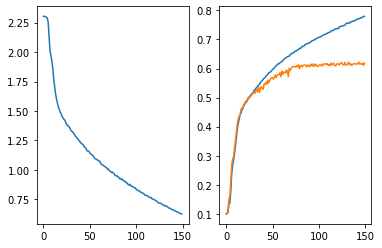

In [ ]:
plt.subplot(1,2,1)
plt.plot(train_losses_hist)
plt.plot(val_losses_hist)

plt.subplot(1,2,2)
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)